<a href="https://colab.research.google.com/github/gregcloud/food-claims-process/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup complete')

Setup complete


In [25]:
# Path on the file to read
claims_filepath = "./claims.csv"

In [26]:
# Read the file into a variable claims
claims = pd.read_csv(claims_filepath)

In [27]:
# Display the first 5 rows of the data
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [28]:
# Display the last 5 rows of the data
claims.tail()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
93,0000000-00.2020.0.00.0023,208,"R$80,396.00",40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,"R$50,000.00",8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,"R$60,000.00",42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,"R$474,542.00",329473.49,NATAL,20,True,NaN
97,0000000-00.2020.0.00.0073,195,"R$40,000.00",15406.95,NATAL,1,False,NaN


In [29]:
# Display all rows of the data
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,"R$80,396.00",40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,"R$50,000.00",8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,"R$60,000.00",42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,"R$474,542.00",329473.49,NATAL,20,True,NaN


In [30]:
# Summary of the claims data to inspect
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [31]:
## The initial claim value in the currency of Brazil should be converted. Ex: “R$50,000.00” should be converted into 50000.
claims['Claim Amount'] = claims['Claim Amount'].str.replace('R','', regex=True)
claims['Claim Amount'] = claims['Claim Amount'].str.replace('$','', regex=True)
claims['Claim Amount'] = claims['Claim Amount'].str.replace(',','', regex=True)
claims['Claim Amount'] = claims['Claim Amount'].astype(float)

In [32]:
# Let's see the change
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     float64
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [33]:
# Let's see the change
claims

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat
...,...,...,...,...,...,...,...,...
93,0000000-00.2020.0.00.0023,208,80396.0,40668.14,FORTALEZA,3,False,meat
94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,NaN


In [34]:
# Let's see the shape of the claims
print('Shape: ', claims.shape)

Shape:  (98, 8)


In [36]:
# Let's see which is the minimun Time to Close a claim
claims['Time to Close'].describe()

count      98.000000
mean      832.346939
std       686.851131
min       -57.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

In [37]:
# Let's see which is the minimun Time to Close a claim
claims['Time to Close'].min()

-57

In [38]:
# Let's replace with postive 57
claims.loc[claims['Time to Close'] == -57, 'Time to Close'] = 57

In [39]:
# Let's see which is the minimun Time to Close a claim
claims['Time to Close'].describe()

count      98.000000
mean      833.510204
std       685.424441
min        29.000000
25%       340.750000
50%       638.500000
75%      1138.750000
max      3591.000000
Name: Time to Close, dtype: float64

In [40]:
# Let's see the causes of the food poisoning
claims['Cause'].value_counts()

meat          12
vegetables     8
Name: Cause, dtype: int64

In [41]:
# Let's see how many NaN has the cause column
claims.loc[claims.Cause.isnull()]

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,NaN
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,NaN
5,0000000-00.2014.0.00.0077,578,150000.0,23214.56,FORTALEZA,6,False,NaN
7,0000000-00.2014.0.00.0043,2354,40870.0,24161.73,FORTALEZA,1,False,NaN
...,...,...,...,...,...,...,...,...
92,0000000-00.2020.0.00.0088,300,111970.0,43757.54,RECIFE,4,False,NaN
94,0000000-00.2020.0.00.0057,86,50000.0,8363.96,FORTALEZA,2,False,NaN
95,0000000-00.2020.0.00.0010,201,60000.0,42318.80,NATAL,2,False,NaN
96,0000000-00.2020.0.00.0059,200,474542.0,329473.49,NATAL,20,True,NaN


In [42]:
# The causes of the food poisoning injuries are ‘vegetable’, ‘meat’, or ‘unknown’. Replace any empty rows with ‘unknown’.
claims = claims.fillna({'Cause':'unknown'})

In [43]:
# Let's also replace 'vegetables' by 'vegetable'.
claims['Cause'] = claims['Cause'].str.replace('vegetables','vegetable', regex=True)

In [44]:
# Let's see the causes of the food poisoning
claims['Cause'].value_counts()

unknown      78
meat         12
vegetable     8
Name: Cause, dtype: int64

Text(0, 0.5, 'Number of claims')

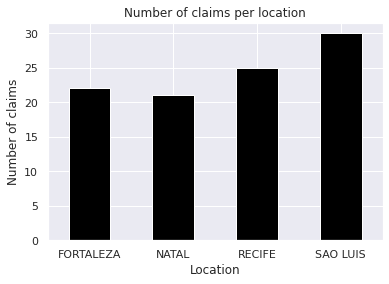

In [45]:
# Let's cluster the location
sns.set_theme()
diamonds= sns.load_dataset("diamonds")

claims.groupby('Location')['Location'].count().plot(kind='bar', rot=360, color='black')
plt.title('Number of claims per location')
plt.ylabel('Number of claims')

Text(12.334999999999994, 0.5, 'Number of claims')

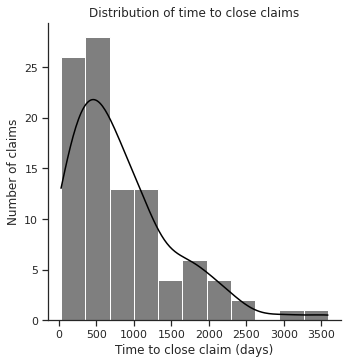

In [46]:
# QUESTION 2
# What is the distribution of time to close claims?

sns.set_theme(style="ticks")
diamonds= sns.load_dataset("diamonds")

sns.displot(claims, x='Time to Close', kde=True, color='black')
plt.title('Distribution of time to close claims')
plt.xlabel('Time to close claim (days)')
plt.ylabel('Number of claims')

Text(0.5, 0, 'Location')

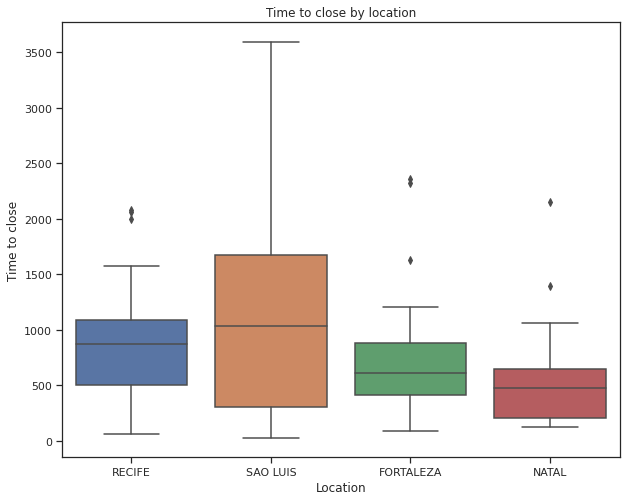

In [47]:
# QUESTION 3
# How does the average time to close claims differ by location?

plt.figure(figsize = (10,8))

sns.boxplot(data=claims, x="Location", y="Time to Close")
plt.title('Time to close by location')
plt.ylabel('Time to close')
plt.xlabel('Location')

Text(0.5, 0, 'Location')

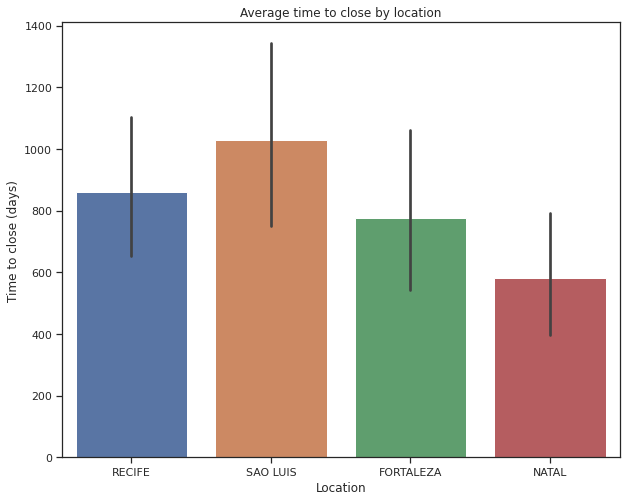

In [48]:
plt.figure(figsize = (10,8))

sns.barplot(data =claims, x = 'Location', y ='Time to Close')
plt.title('Average time to close by location')
plt.ylabel('Time to close (days)')
plt.xlabel('Location')